In [2]:
import statsmodels.api as sm
import warnings
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

In [3]:
y_stats_original = pd.read_csv("y_stats_original.csv")
y_stats_original["DateTime"] = pd.to_datetime(y_stats_original["DateTime"])

In [4]:
#### CONSTANTS
N_SAMPLES = 5
MAX_SAMPLE_SIZE = 15000

# Check parameter fit_kw={"method":'css'}

Sample Size = 100
Sample Size = 3825
Sample Size = 7550
Sample Size = 11275
Sample Size = 15000


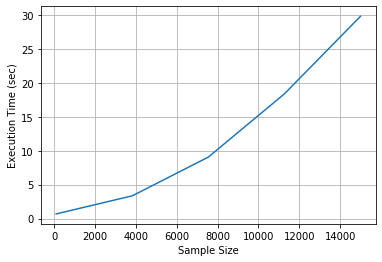

In [6]:
# Searching the optimal parameters for ARIMA
sample_sizes = np.linspace(100, MAX_SAMPLE_SIZE, num=N_SAMPLES).astype(int)
execution_time = []
for ss in sample_sizes:
    print(f"Sample Size = {ss}")
    start_time = time.time()                                       # with parameter fit_kw={"method":'css'}
    param = sm.tsa.arma_order_select_ic(y_stats_original["Close"][:ss], ic='aic', trend='nc', fit_kw={"method":'css'})
    exec_time = time.time() - start_time
    execution_time.append(exec_time)
    
plt.plot(sample_sizes, execution_time)
plt.xlabel("Sample Size")
plt.ylabel("Execution Time (sec)")
plt.grid()
    


In [7]:
param

{'aic':               0             1             2
 0           NaN  93274.592947  84474.380714
 1  65553.415960  63903.903512  63713.880565
 2  64367.898914  63643.305046  63110.855140
 3  64004.700352  63211.643125  63077.880072
 4  63820.922019  63108.643350  63208.765899, 'aic_min_order': (3, 2)}

Sample Size = 100
Sample Size = 3825
Sample Size = 7550
Sample Size = 11275
Sample Size = 15000


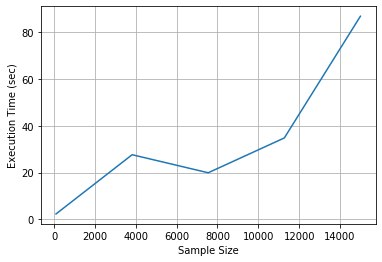

In [8]:
# Searching the optimal parameters for ARIMA
execution_time = []
for ss in sample_sizes:
    print(f"Sample Size = {ss}")
    start_time = time.time()                                  # WITHOUT parameter fit_kw={"method":'css'}
    param = sm.tsa.arma_order_select_ic(y_stats_original["Close"][:ss], ic='aic', trend='nc')
    exec_time = time.time() - start_time
    execution_time.append(exec_time)
    
plt.plot(sample_sizes, execution_time)
plt.xlabel("Sample Size")
plt.ylabel("Execution Time (sec)")
plt.grid()


In [9]:
param

{'aic':               0             1             2
 0           NaN  93274.613780  84473.134365
 1  65560.376302  63911.014109  63721.030099
 2  64378.229763  63653.753668  63125.557655
 3  64018.327902  63229.717503  63093.185166
 4  63837.821497  63128.382392  63236.202822, 'aic_min_order': (3, 2)}

# Check Log and Original Data

Not much difference by runnign with original data or log data

In [5]:
y_stats_log = pd.read_csv("y_stats_log.csv")
y_stats_log["DateTime"] = pd.to_datetime(y_stats_log["DateTime"])

Sample Size = 100
Sample Size = 3825
Sample Size = 7550
Sample Size = 11275
Sample Size = 15000


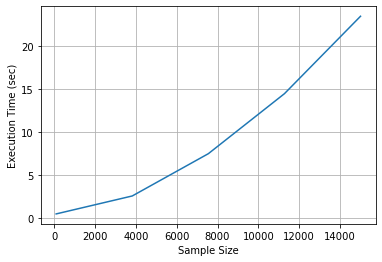

In [11]:
# Searching the optimal parameters for ARIMA
sample_sizes = np.linspace(100, MAX_SAMPLE_SIZE, num=N_SAMPLES).astype(int)
execution_time = []
for ss in sample_sizes:
    print(f"Sample Size = {ss}")
    start_time = time.time()                                       # with parameter fit_kw={"method":'css'}
    param = sm.tsa.arma_order_select_ic(y_stats_log["Close"][:ss], ic='aic', trend='nc', fit_kw={"method":'css'})
    exec_time = time.time() - start_time
    execution_time.append(exec_time)
    
plt.plot(sample_sizes, execution_time)
plt.xlabel("Sample Size")
plt.ylabel("Execution Time (sec)")
plt.grid()

In [11]:
param

{'aic':               0             1             2
 0           NaN  93274.613780  84473.134365
 1  65560.376302  63911.014109  63721.030099
 2  64378.229763  63653.753668  63125.557655
 3  64018.327902  63229.717503  63093.185166
 4  63837.821497  63128.382392  63236.202822, 'aic_min_order': (3, 2)}

# Check the optimal parameter for SARIMA

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Parameter: order(p, d, q)
min_p = 1; max_p = 3 # min_p must be more than 1
min_d = 0; max_d = 1
min_q = 0; max_q = 3 

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1) * (max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1) #avoid: 
    
print("pattern:", test_pattern)

sfq = 48 # seasonal_order
data = y_stats_log["Close"][83328-17520:] # train data(only for a year)

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            data, order=(p, d, q), 
                            seasonal_order=(sp, sd, sq, sfq), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + ")", "seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")" #avoid: 
                        test_results.iloc[num]["aic"] = sarima.aic
                        print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                        num = num + 1

# Results (Minimum AIC)
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 192
0 / 191 ('order=(1,0,0)', 'seasonal_order=(0,0,0)') 39730.2118161777
1 / 191 ('order=(1,0,0)', 'seasonal_order=(0,0,1)') 39467.29393742798
2 / 191 ('order=(1,0,0)', 'seasonal_order=(0,1,0)') 47567.815526162754
3 / 191 ('order=(1,0,0)', 'seasonal_order=(0,1,1)') 37930.08653275033
4 / 191 ('order=(1,0,0)', 'seasonal_order=(1,0,0)') 39435.80186920583
5 / 191 ('order=(1,0,0)', 'seasonal_order=(1,0,1)') 38017.66795255078
6 / 191 ('order=(1,0,0)', 'seasonal_order=(1,1,0)') 43200.30439261093
7 / 191 ('order=(1,0,0)', 'seasonal_order=(1,1,1)') 37990.74697806246
8 / 191 ('order=(1,0,1)', 'seasonal_order=(0,0,0)') 38002.624187967325
9 / 191 ('order=(1,0,1)', 'seasonal_order=(0,0,1)') 37686.71514433191
10 / 191 ('order=(1,0,1)', 'seasonal_order=(0,1,0)') 46734.33509418482
11 / 191 ('order=(1,0,1)', 'seasonal_order=(0,1,1)') 36494.84331230611
12 / 191 ('order=(1,0,1)', 'seasonal_order=(1,0,0)') 37646.670771463774
13 / 191 ('order=(1,0,1)', 'seasonal_order=(1,0,1)') 36583.182952811454


115 / 191 ('order=(2,1,2)', 'seasonal_order=(0,1,1)') 36171.140620718805
116 / 191 ('order=(2,1,2)', 'seasonal_order=(1,0,0)') 37136.03078216529
117 / 191 ('order=(2,1,2)', 'seasonal_order=(1,0,1)') 36272.96745753262
118 / 191 ('order=(2,1,2)', 'seasonal_order=(1,1,0)') 42065.82774972057
119 / 191 ('order=(2,1,2)', 'seasonal_order=(1,1,1)') 36178.85101180659
120 / 191 ('order=(2,1,3)', 'seasonal_order=(0,0,0)') 37469.03587979183
121 / 191 ('order=(2,1,3)', 'seasonal_order=(0,0,1)') 37162.027092157674
122 / 191 ('order=(2,1,3)', 'seasonal_order=(0,1,0)') 47008.32417695604
123 / 191 ('order=(2,1,3)', 'seasonal_order=(0,1,1)') 36245.19994968367
124 / 191 ('order=(2,1,3)', 'seasonal_order=(1,0,0)') 37129.12451732829
125 / 191 ('order=(2,1,3)', 'seasonal_order=(1,0,1)') 36285.54783538365
126 / 191 ('order=(2,1,3)', 'seasonal_order=(1,1,0)') 42088.382619636235
127 / 191 ('order=(2,1,3)', 'seasonal_order=(1,1,1)') 36252.12743867197
128 / 191 ('order=(3,0,0)', 'seasonal_order=(0,0,0)') 38064.1

In [13]:
test_results.sort_values(by='aic').head(10) # aic top10

,model_parameters,aic
59,"(order=(1,1,3), seasonal_order=(0,1,1))",36165.928748
179,"(order=(3,1,2), seasonal_order=(0,1,1))",36167.863471
115,"(order=(2,1,2), seasonal_order=(0,1,1))",36171.140621
187,"(order=(3,1,3), seasonal_order=(0,1,1))",36173.579777
119,"(order=(2,1,2), seasonal_order=(1,1,1))",36178.851012
95,"(order=(2,0,3), seasonal_order=(1,1,1))",36222.429944
183,"(order=(3,1,2), seasonal_order=(1,1,1))",36232.22999
191,"(order=(3,1,3), seasonal_order=(1,1,1))",36238.622654
51,"(order=(1,1,2), seasonal_order=(0,1,1))",36245.15946
123,"(order=(2,1,3), seasonal_order=(0,1,1))",36245.19995
